<a href="https://colab.research.google.com/github/rickymwethera/KNN-study/blob/main/KNN_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Digit Classification Project**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
digits = load_digits()
X, y = digits.data, digits.target


print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (1797, 64)
Labels shape: (1797,)


In [4]:
# Define the K-Nearest Neighbors model
knn = KNeighborsClassifier()

In [5]:
# Function to train and evaluate the model
def evaluate_model(X, y, test_size):
    # splitting the dataset to get train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    return accuracy, precision, recall, f1

In [7]:
# Define test sizes
test_sizes = [0.3, 0.5, 0.7]
results = {}

# Evaluate model for different test sizes and store the results
for test_size in test_sizes:
    accuracy, precision, recall, f1 = evaluate_model(X, y, test_size)
    results[test_size] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Display the results
for test_size, metrics in results.items():
    print(f"Test size: {test_size}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("\n")

Test size: 0.3
Accuracy: 0.9926
Precision: 0.9933
Recall: 0.9934
F1 Score: 0.9933


Test size: 0.5
Accuracy: 0.9755
Precision: 0.9755
Recall: 0.9760
F1 Score: 0.9756


Test size: 0.7
Accuracy: 0.9690
Precision: 0.9690
Recall: 0.9689
F1 Score: 0.9686




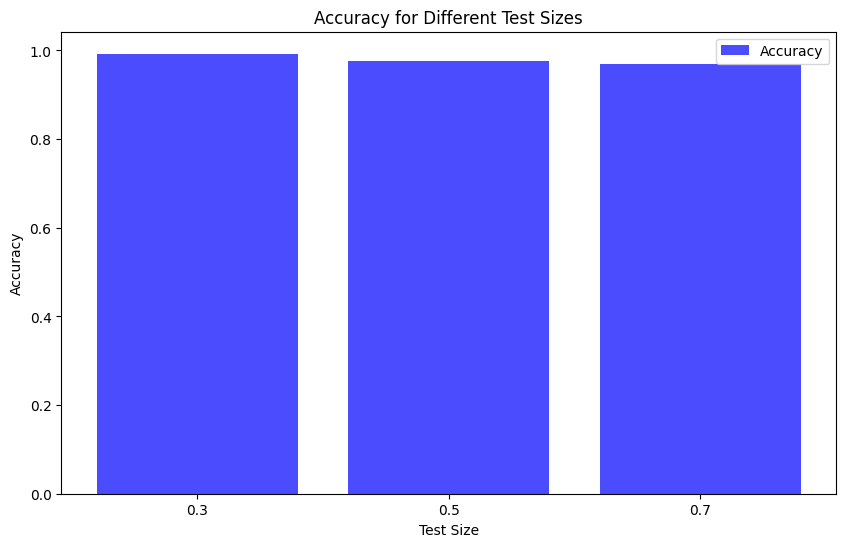

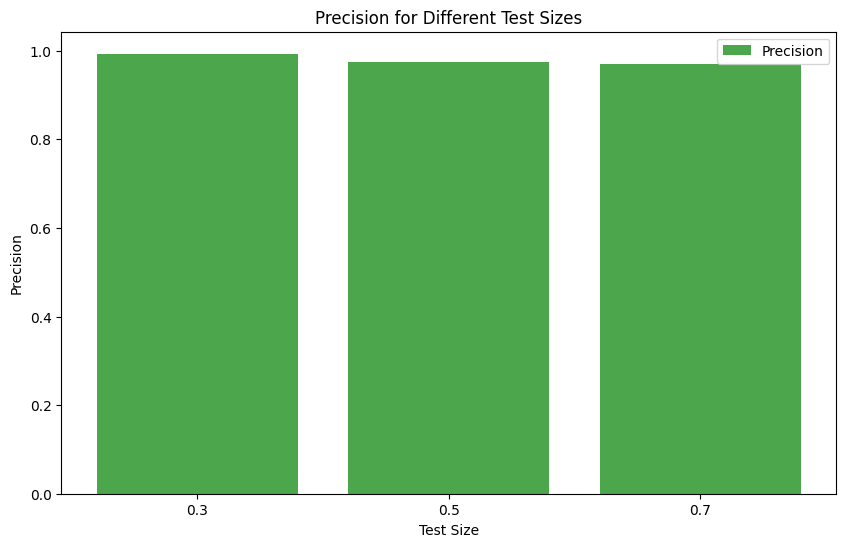

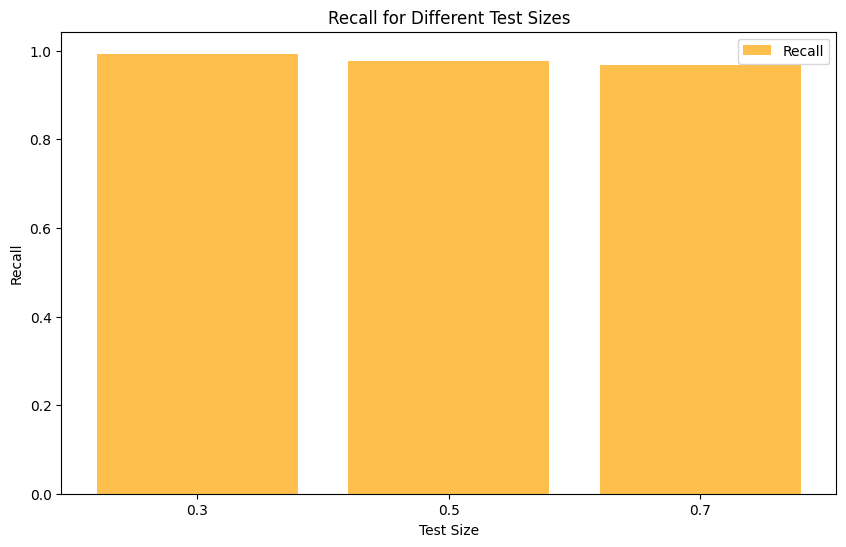

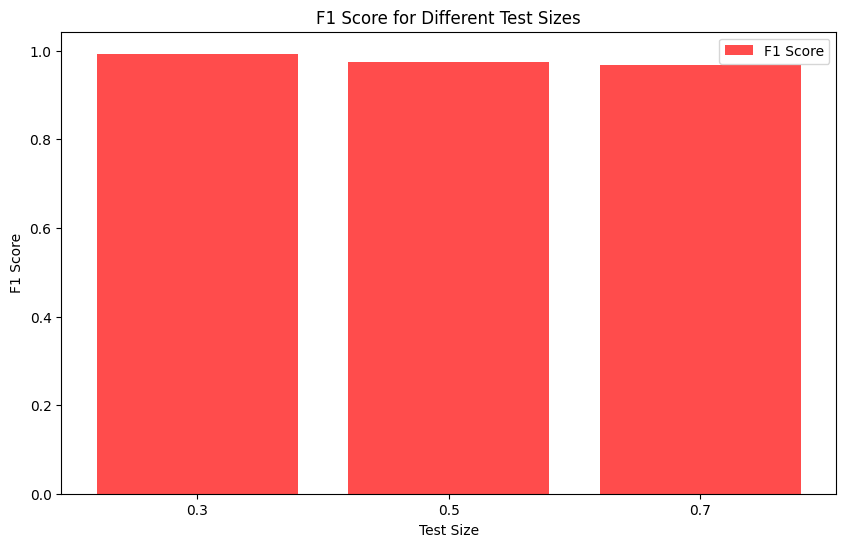

In [8]:
# Visualize the results using bar plots

# Extract metrics for plotting
test_sizes_labels = [str(ts) for ts in test_sizes]
accuracy = [results[ts]["Accuracy"] for ts in test_sizes]
precision = [results[ts]["Precision"] for ts in test_sizes]
recall = [results[ts]["Recall"] for ts in test_sizes]
f1_scores = [results[ts]["F1 Score"] for ts in test_sizes]

# Plot Accuracy
plt.figure(figsize=(10, 6))
plt.bar(test_sizes_labels, accuracy, color='blue', alpha=0.7, label='Accuracy')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Test Sizes')
plt.legend()
plt.show()

# Plot Precision
plt.figure(figsize=(10, 6))
plt.bar(test_sizes_labels, precision, color='green', alpha=0.7, label='Precision')
plt.xlabel('Test Size')
plt.ylabel('Precision')
plt.title('Precision for Different Test Sizes')
plt.legend()
plt.show()

# Plot Recall
plt.figure(figsize=(10, 6))
plt.bar(test_sizes_labels, recall, color='orange', alpha=0.7, label='Recall')
plt.xlabel('Test Size')
plt.ylabel('Recall')
plt.title('Recall for Different Test Sizes')
plt.legend()
plt.show()

# Plot F1 Score
plt.figure(figsize=(10, 6))
plt.bar(test_sizes_labels, f1_scores, color='red', alpha=0.7, label='F1 Score')
plt.xlabel('Test Size')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Test Sizes')
plt.legend()
plt.show()

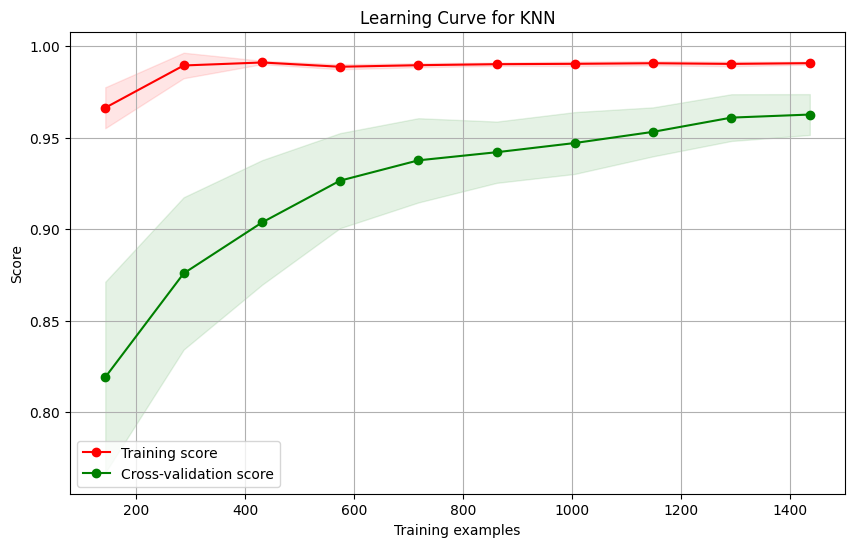

In [9]:
# Import necessary library for learning curve
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for KNN
plot_learning_curve(knn, X, y, title="Learning Curve for KNN")
plt.show()

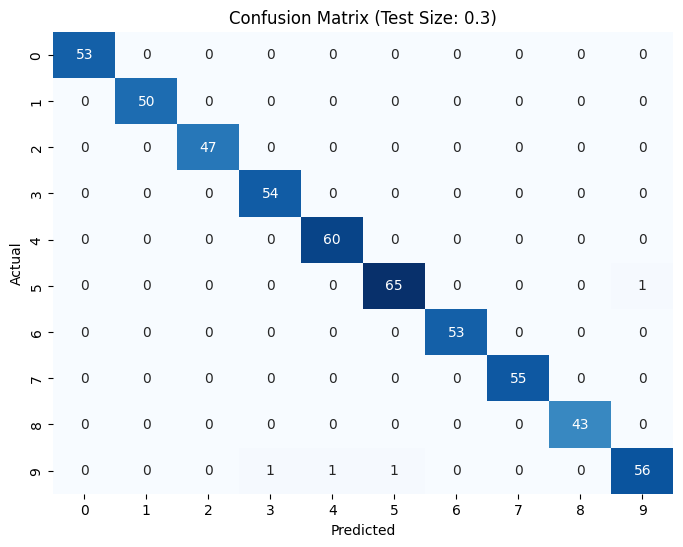

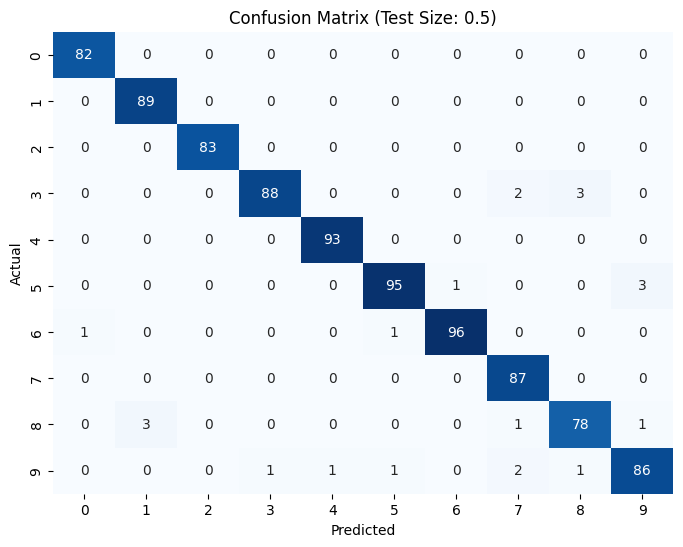

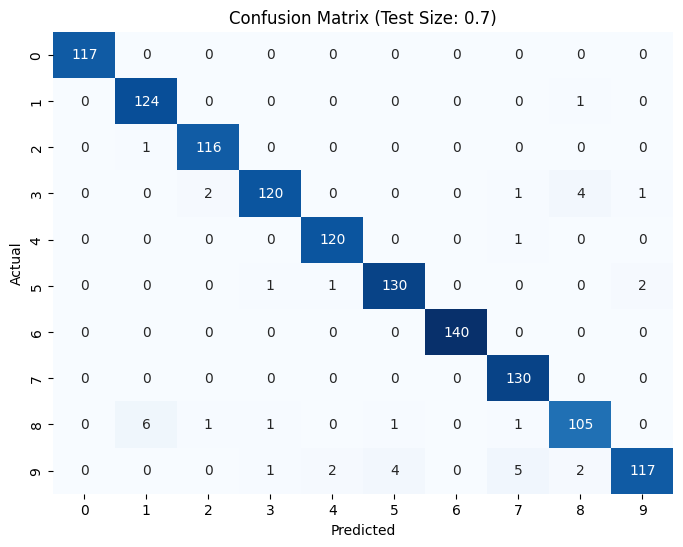

In [10]:
# Import necessary library for confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate and plot confusion matrix for each test size
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    plot_confusion_matrix(y_test, y_pred, title=f"Confusion Matrix (Test Size: {test_size})")

## **Observation**

Accuracy: The model performs somewhat better with more training data, as evidenced by the accuracy decreasing as test size grows.

Precision, Recall, and F1 Score: These three metrics show comparable patterns. The values exhibit a modest decline with increasing test size, peaking at 0.3.